#**Nataly phawllyn Neira Parra cod: 614212782**
#**Juan Sebastián Vargas Arévalo cod: 6142121007**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def graf_solucion_continua(yt,a,b):
  resol = 512
  tn = np.linspace(a,b,resol + 1)
  yn = np.zeros(resol+1)
  for n in range(resol+1):
    yn[n]=yt( tn[n] )
  plt.plot(tn,yn,'-b')
  plt.xlabel('x')
  plt.ylabel('u')
  plt.grid(True)

def graf_solucion_discreta(th,yh):
  # yh, th con longitud N+1 deben incluir valor inicial y0 y tiempo inicial t0
  plt.plot(th,yh,':.r')

In [3]:
def u_exacta(x):
  match problema:
    case 1:
      u = x**2 - x
    case 2:
      u = np.exp(2*x)
    case 3:
       u = np.sin(np.pi*x)
  return u

def du_exacta(x):
  match problema:
    case 1:
      du = 2.0*x-1.0
    case 2:
      du = 2*np.exp(2*x)
    case 3:
      du= np.pi*np.cos(np.pi*x)
  return du

def d2u_exacta(x):
  match problema:
    case 1:
      d2u = 2.0
    case 2:
      d2u = 4*np.exp(2*x)
    case 3:
      d2u= -(np.pi**2)*np.sin(np.pi*x)
  return d2u

def fuente(x):
  if manufacturada:
    # en este caso, se aplica el operador diferencial a solución manufacturada
    f = -coef_a * d2u_exacta(x) + coef_b * du_exacta(x) + coef_c*u_exacta(x)
  else:
     # si no se usa solución manufacturada se debe dar el valor deseado para
     # la carga de cada problema, con un match-case posiblemente
    f = 0
  return f

def d_izq(x_izq):
  if manufacturada:
    d = u_exacta(x_izq)
  else:
     # si no se usa solución manufacturada se debe dar el valor deseado para
     # la carga de cada problema, con un match-case posiblemente
    d = 0
  return d

def d_der(x_der):
  if manufacturada:
    d = u_exacta(x_der)
  else:
     # si no se usa solución manufacturada se debe dar el valor deseado para
     # la carga de cada problema, con un match-case posiblemente
    d = 0
  return d

def g_izq(x_izq):
  if manufacturada:
    g = coef_a*du_exacta(x_izq)
  else:
     # si no se usa solución manufacturada se debe dar el valor deseado para
     # la carga de cada problema, con un match-case posiblemente
    g = 0
  return g

def g_der(x_der):
  if manufacturada:
    g = -coef_a*du_exacta(x_der)
  else:
     # si no se usa solución manufacturada se debe dar el valor deseado para
     # la carga de cada problema, con un match-case posiblemente
    g = 0
  return g

ED
$$
(-a(x)u'(x))'+b(x)u'(x)+c(x)u(x) = f(x)
$$
Operador diferencial
$$
\mathcal{L}y=(-a(x)y'(x))'+b(x)y'(x)+c(x)y(x)
$$
Ejemplo
$$
-u''+3u=f \\
u(0)=d_{izq} \\
-u'(1)=g_{der}
$$

Ecuaciones para nodos internos

$$
-\frac{a}{h^2}U_{i-1}+\left(\frac{2a}{h^2}+c\right)U_i-\frac{a}{h^2}U_{i+1}=f(x_i)
$$

Para la condición Dirichlet en la derecha
$$
U_0 = d_{izq}
$$
Para la condición Neumann en la izquierda
$$
\frac{-2a}{h^2}U_{M-1}+\left(\frac{2a}{h^2}+c\right)U_M=f(x_M)-g_{der}\frac{2}{h}
$$

In [4]:
def MDF(x_izq,cond_izq,x_der,cond_der,M,c=None):
  # creamos nodos y calculamos h
  x_nod=np.linspace(x_izq,x_der,M+1)
  h= (x_der-x_izq)/float(M)

  # Empezamos a armar una matriz M+1 x M+1 K,
  # y un vector de términos independientes F
  # La idea es resolver sistema K U = F, donde U contiene las soluciones nodales

  # inicializamos
  K = np.zeros((M+1,M+1))
  F = np.zeros(M+1)
  U = np.zeros(M+1)

  # Primero llenamos ecuaciones para los nodos internos  1,2,3,...,M-1
  for i in range(1,M):    # fila i de matriz K y vector F
    K[i][i-1] = -coef_a / h**2
    K[i][i]   = 2*coef_a/h**2 + coef_c
    K[i][i+1] = -coef_a / h**2
    F[i]      = fuente(x_nod[i])


  # Ahora, condición en extremo izquierdo ----> fila 0 de matriz K y vector F
  match cond_izq:
    case 'Dirichlet':
    # Condición Dirichlet
      K[0][0] = 1.0
      F[0]    = d_izq(x_izq)
    case 'Neumann':
    # Condición Neumann
      K[0][0] = 2*coef_a/h**2 + coef_c
      K[0][1] = -2*coef_a/h**2
      F[0]    = fuente(x_izq)-g_izq(x_izq) * 2.0 / h

  # Ahora, condición en extremo derecho ----> fila M de matriz K y vector F
  match cond_der:
    case 'Dirichlet':
    # Condición Dirichlet
      K[M][M] = 1.0
      F[M]    = d_der(x_der)
    case 'Neumann':
    # Condición Neumann
      K[M][M-1]= -2*coef_a/h**2
      K[M][M]  = 2*coef_a/h**2 + coef_c
      F[M]     = fuente(x_der)-g_der(x_der) *2.0 / h



  # Resuelvo sistema
  U = np.linalg.solve(K,F)

  return x_nod,U,h   #   lista de nodos, lista de soluciones nodales


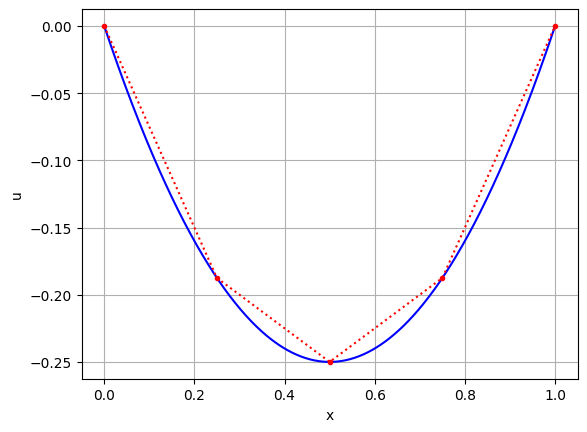

In [5]:
problema = 1
manufacturada = True
coef_a = 1.0
coef_b = 0.0
coef_c = 3.0
x_izq = 0.0
cond_izq = 'Dirichlet'    #  los valores son 'Dirichlet' o 'Neumann'
x_der = 1.0
cond_der = 'Neumann'    #  los valores son 'Dirichlet' o 'Neumann'

M = 4

x_nod,U,h = MDF(x_izq,cond_izq,x_der,cond_der,M)

# para graficar sol continua
if manufacturada:
  graf_solucion_continua(u_exacta,x_izq,x_der)

graf_solucion_discreta(x_nod,U)



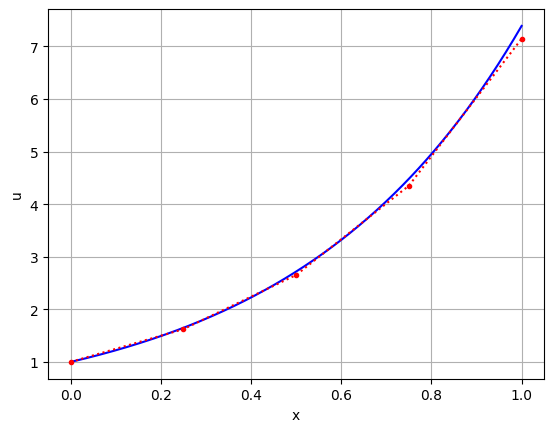

In [6]:
problema = 2
manufacturada = True
coef_a = 1.0
coef_b = 0.0
coef_c = 3.0
x_izq = 0.0
cond_izq = 'Dirichlet'    #  los valores son 'Dirichlet' o 'Neumann'
x_der = 1.0
cond_der = 'Neumann'    #  los valores son 'Dirichlet' o 'Neumann'

M = 4

x_nod,U,h = MDF(x_izq,cond_izq,x_der,cond_der,M)

# para graficar sol continua
if manufacturada:
  graf_solucion_continua(u_exacta,x_izq,x_der)

graf_solucion_discreta(x_nod,U)



TAREA

1. Proponer e implementar su propia solución manufacturada (que no sea un polinomio). Es decir, cree un nuevo caso para la variable problema, con el cual evaluar u_exacta, du_exacta, y d2u_exacta. Verifique que la solución numérica sí aproxime bien a la exacta.

2. Para las 3 soluciones manufacturadas disponibles, probar varios valores de h y hacer una gráfica log-log de error vs h. El error se obtiene con la norma del vector de diferencias entre solución numérica  y solución exacta evaluada en todos los nodos de la partición.

3. Además, con tres combinaciones de condiciones de frontera (Dirichlet-Dirichlet, Dirichlet-Neumann y Neumann-Neumann), reduzca varias veces el valor del coeficiente c hasta que se haga cero. Comente acerca de cómo varían los resultados según varía c y las condiciones de frontera.

Puede realizarlo individualmente o en pareja.

#Solucíon

1.  se usa la solución manufacturada como
$$u(x)=sen(\pi x)$$


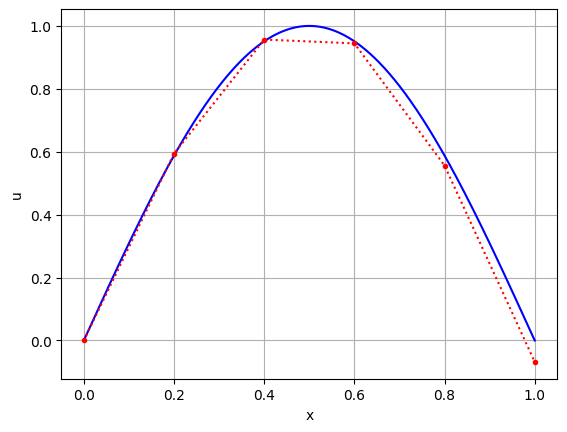

In [7]:
problema = 3
manufacturada = True
coef_a = 1.0
coef_b = 0.0
coef_c = 3.0
x_izq = 0.0
cond_izq = 'Dirichlet'    #  los valores son 'Dirichlet' o 'Neumann'
x_der = 1.0
cond_der = 'Neumann'    #  los valores son 'Dirichlet' o 'Neumann'

M = 5

x_nod,U,h = MDF(x_izq,cond_izq,x_der,cond_der,M)

# para graficar sol continua
if manufacturada:
  graf_solucion_continua(u_exacta,x_izq,x_der)

graf_solucion_discreta(x_nod,U)

2. Error  vs  h

In [8]:
def Error_metodo(x_nod,U):
  """
  esta  funcion calcula el  error  máximo de  un  problema manufacturado vs  la solucion discreta   punto a punto
  ENTRADAS
    u_exacta[array] : Funcion manufacturada
    U[array]        : Solucion discreta
    M[int]          : Numero de pasos

  SALIDA
    error[float]   : valores del  error promedio  el error punto a punto
  """
  n=len(U)
  U_exc=u_exacta(x_nod)
  error= np.abs(U_exc-U)
  return np.max(error)


def error_vs_h(x_izq,cond_izq,x_der,cond_der):
  M=np.array([5,10,50,100,500])
  error=[]
  H=[]
  for m in M:
     x_nod,U,h = MDF(x_izq,cond_izq,x_der,cond_der,m)
     H.append(h)
     error.append(Error_metodo(x_nod,U))
  return error,H


In [9]:
manufacturada = True
coef_a = 1.0
coef_b = 0.0
coef_c = 3.0
x_izq = 0.0
cond_izq = 'Dirichlet'    #  los valores son 'Dirichlet' o 'Neumann'
x_der = 1.0
cond_der = 'Neumann'    #  los valores son 'Dirichlet' o 'Neumann'

problema = 1
error1,h1=error_vs_h(x_izq,cond_izq,x_der,cond_der)

problema = 2
error2,h2=error_vs_h(x_izq,cond_izq,x_der,cond_der)

problema = 3
error3,h3=error_vs_h(x_izq,cond_izq,x_der,cond_der)


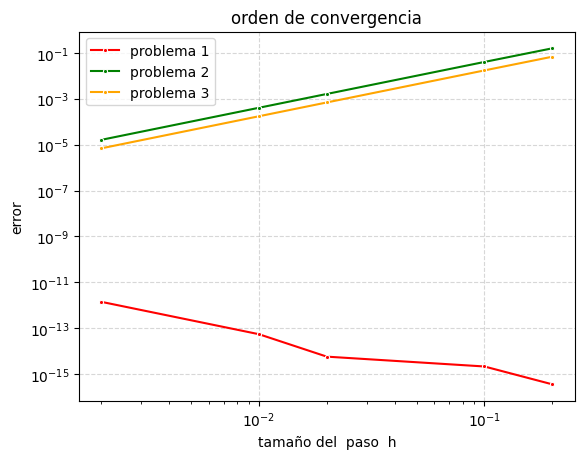

In [10]:
sns.lineplot(x=h1, y=error1, label='problema 1', color='red', marker ='.')
sns.lineplot(x=h2, y=error2, label='problema 2', color='green', marker ='.')
sns.lineplot(x=h3, y=error3, label='problema 3', color='orange', marker ='.')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('tamaño del  paso  h')
plt.ylabel('error')
plt.title('orden de convergencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Además, con tres combinaciones de condiciones de frontera (Dirichlet-Dirichlet, Dirichlet-Neumann y Neumann-Neumann), reduzca varias veces el valor del coeficiente c hasta que se haga cero. Comente acerca de cómo varían los resultados según varía c y las condiciones de frontera.

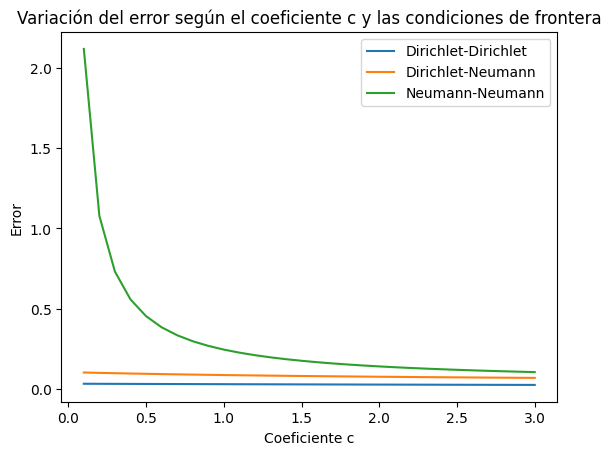

In [11]:


coef_c = 3.0
x_izq = 0.0
cond_izq = 'Dirichlet'    #  los valores son 'Dirichlet' o 'Neumann'
x_der = 1.0
cond_der = 'Dirichlet'    #  los valores son 'Dirichlet' o 'Neumann'
M = 5

error_dd = []
cs_dd = []
while coef_c >= 0.0:
  x_nod, U, h = MDF(x_izq, cond_izq, x_der, cond_der, M)
  error_dd.append(Error_metodo(x_nod, U))
  cs_dd.append(coef_c)
  coef_c -= 0.1

# Dirichlet-Neumann
coef_c = 3.0
x_izq = 0.0
cond_izq = 'Dirichlet'    #  los valores son 'Dirichlet' o 'Neumann'
x_der = 1.0
cond_der = 'Neumann'    #  los valores son 'Dirichlet' o 'Neumann'
M = 5

error_dn = []
cs_dn = []
while coef_c >= 0.0:
  x_nod, U, h = MDF(x_izq, cond_izq, x_der, cond_der, M)
  error_dn.append(Error_metodo(x_nod, U))
  cs_dn.append(coef_c)
  coef_c -= 0.1

# Neumann-Neumann
coef_c = 3.0
x_izq = 0.0
cond_izq = 'Neumann'    #  los valores son 'Dirichlet' o 'Neumann'
x_der = 1.0
cond_der = 'Neumann'    #  los valores son 'Dirichlet' o 'Neumann'
M = 5

error_nn = []
cs_nn = []
while coef_c >= 0.0:
  x_nod, U, h = MDF(x_izq, cond_izq, x_der, cond_der, M)
  error_nn.append(Error_metodo(x_nod, U))
  cs_nn.append(coef_c)
  coef_c -= 0.1

# Graficar los resultados
plt.plot(cs_dd, error_dd, label='Dirichlet-Dirichlet')
plt.plot(cs_dn, error_dn, label='Dirichlet-Neumann')
plt.plot(cs_nn, error_nn, label='Neumann-Neumann')

plt.xlabel('Coeficiente c')
plt.ylabel('Error')
plt.title('Variación del error según el coeficiente c y las condiciones de frontera')
plt.legend()
plt.show()



# Análisis
A medida que el coeficiente c se acerca a cero, el error aumenta para todas las combinaciones de condiciones de frontera. Además, se puede observar que el error es mayor para las condiciones de frontera Neumann-Neumann que para las otras dos combinaciones.